# #Task 2 : Colour Identification in Images
## To identify colours in images and classify them
## Done by : Ahan Anupam

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

## Getting the sample images

### The get_image function reads the image and converts it from BGR to RGB format.

In [2]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [3]:
SAMPLE_DIR = 'samples'
sample_img = []
for file in os.listdir(SAMPLE_DIR):
    if not file.startswith('.'):
        sample_img.append(get_image(os.path.join(SAMPLE_DIR, file)))

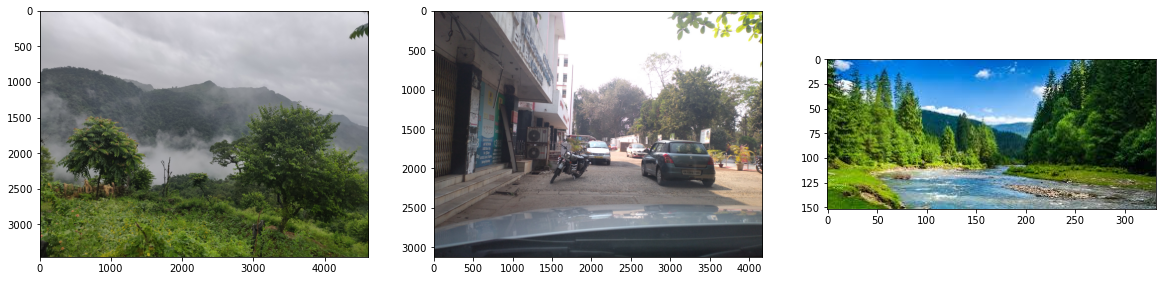

In [4]:
plt.figure(figsize=(20, 10))
for i in range(len(sample_img)):
    plt.subplot(1, len(sample_img), i+1)
    plt.imshow(sample_img[i])

## Some important functions to get the colour pie chart

### This function converts the colours from RGB to hexadecimal format to be used as labels in piechart.

In [5]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

### The images are then resized and the colours present are obtained by using the KMeans Clustering Algorithm which predicts the top colours present and groups them into clusters for each image. 
### Finally, the function returns the colours in the form of an array and the visualisation in the form of a pie chart.

In [6]:
def get_colors(image, number_of_colors, show_chart):
    # Image is resized
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    # KMeans Clustering Model
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)

    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return rgb_colors

## Colour Distribution in images represented by Pie Chart

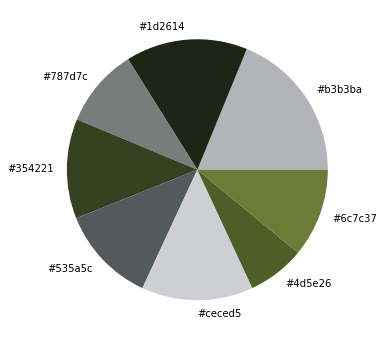

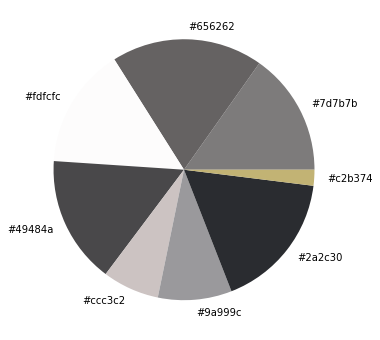

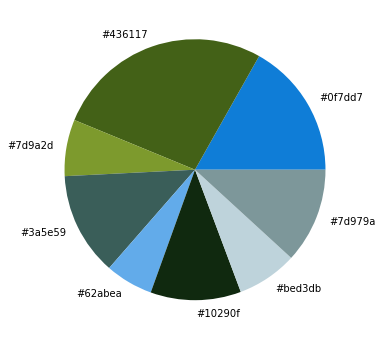

In [7]:
for i in range(len(sample_img)):
    rgb_colours = get_colors(sample_img[i], 8, True)

## Getting the test images and the colour dictionary

In [8]:
IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED': [128, 0, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

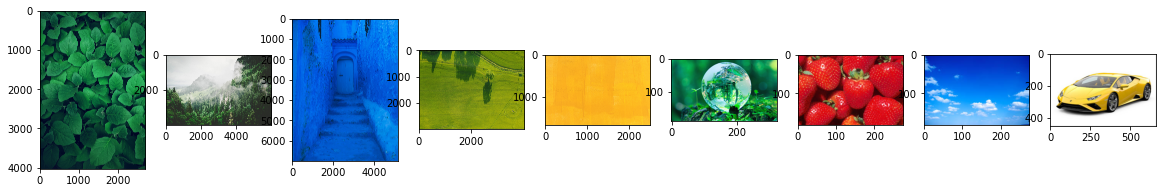

In [9]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

## Functions for image classification

### This function matches the images with the suitable colour based on certain defined thresholds. The above KMeans model is used to get the major colours present in the images.

In [10]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

### This function displays the images of the chosen colour.

In [11]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

### Detecting images with green colour

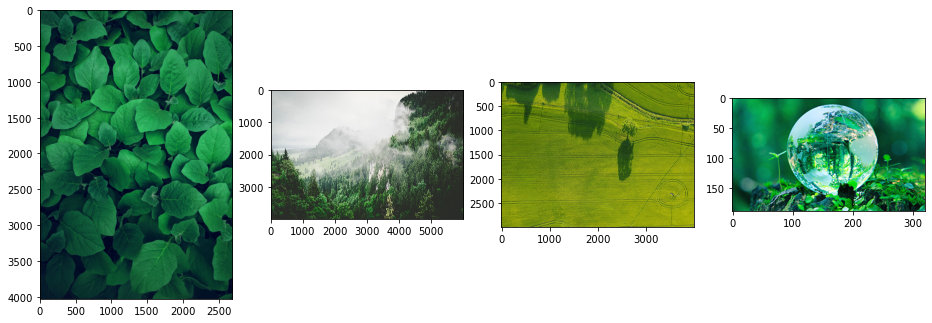

In [12]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

### Detecting images with Yellow Colour

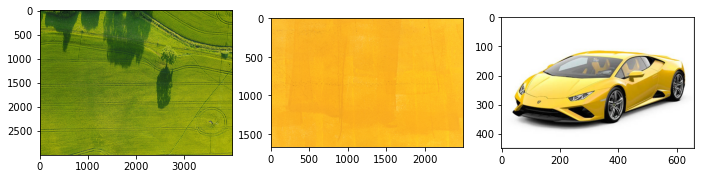

In [13]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

### Detecting images with Blue Colour

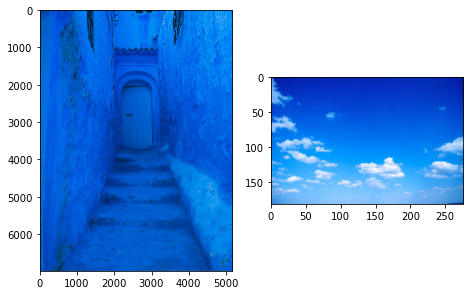

In [14]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

### Detecting images with Red Colour

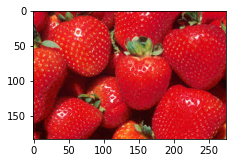

In [15]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 60, 5)